In [1]:
#new type of normalization
#unnormalizing before plot
# tanh activation

# Imports

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import scipy.interpolate as interp
import lalsimulation as lal
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model
import keras
import keras_metrics as km
import keras
import keras_metrics as km
from keras import metrics

2023-07-25 08:31:51.901393: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Functions

In [188]:
#min-max normalize any array to between -1 and 1

def minmax(inputarray):
    
    gmax = inputarray.max()
    
    newarray = inputarray / gmax
                
    return newarray, gmax


In [185]:
#return gammas back to original values in order to plot EOS

def unnorm(gammaarray):
    
    for i in range (len(gammaarray)):
        new_gamma0_array = gammaarray[0] * gam0max
        new_gamma1_array = gammaarray[1] * gam1max
        new_gamma2_array = gammaarray[2] * gam2max
        new_gamma3_array = gammaarray[3] * gam3max
    
    #gamma_array =  np.array([[0] * 4 ])
    new_gamma_array = np.concatenate((new_gamma0_array, new_gamma1_array, new_gamma2_array, new_gamma3_array), axis=1)

#        #change these values 
#        new_gamma0_array = ((gammaarray - gammaarray[0].min())/(gammaarray[0].max() - gammaarray[0].min())) * (2.0 - 0.2) + 0.2
#        new_gamma1_array = ((gammaarray - gammaarray[1].min())/(gammaarray[1].max() - gammaarray[1].min())) * (1.7 - (-1.6)) + (-1.6)
#        new_gamma2_array = ((gammaarray - gammaarray[2].min())/(gammaarray[2].max() - gammaarray[2].min())) * (0.6 - (-0.6)) + (-0.6)
#        new_gamma3_array = ((gammaarray - gammaarray[3].min())/(gammaarray[3].max() - gammaarray[3].min())) * (0.02 - (-0.02)) + (-0.02)
        
#        new_gamma_array = np.concatenate((new_gamma0_array, new_gamma1_array, new_gamma2_array, new_gamma3_array), axis=1)
        
    return new_gamma_array
    

In [2]:
#formatting array & processing outputs

def format_output(data):
    gamma0 = data.pop('gamma0')
    gamma0 = np.array(gamma0)
    gamma1 = data.pop('gamma1')
    gamma1 = np.array(gamma1)
    gamma2 = data.pop('gamma2')
    gamma2 = np.array(gamma2)
    gamma3 = data.pop('gamma3')
    gamma3 = np.array(gamma3)
    return gamma0, gamma1, gamma2, gamma3


In [163]:
def whiten(df):
    
    df_new = pd.DataFrame()
    for k in df.keys():
        df_new[k] = (df[k]-np.mean(df[k])) / np.std(df[k])
    return df_new

    #return (x - train_stats['mean']) / train_stats['std']

#  MLA

In [3]:
#inputs

m1_dat = np.loadtxt("m1.dat.txt", dtype=float)
m2_dat = np.loadtxt("m2.dat.txt", dtype=float)
l1_dat = np.loadtxt("l1.dat.txt", dtype=float)
l2_dat = np.loadtxt("l2.dat.txt", dtype=float)

#normalize inputs

#m1_dat, m1max = minmax(m1_dat)
#m2_dat, m2max = minmax(m2_dat)
#l1_dat, l1max = minmax(l1_dat)
#l2_dat, l2max = minmax(l2_dat)

#outputs

sd_gamma0 = np.loadtxt("sd_gamma0.dat.txt", dtype=float)
sd_gamma1 = np.loadtxt("sd_gamma1.dat.txt", dtype=float)
sd_gamma2 = np.loadtxt("sd_gamma2.dat.txt", dtype=float)
sd_gamma3 = np.loadtxt("sd_gamma3.dat.txt", dtype=float)

#normalize outputs

#sd_gamma0, gam0max = minmax(sd_gamma0)
#sd_gamma1, gam1max = minmax(sd_gamma1)
#sd_gamma2, gam2max = minmax(sd_gamma2)
#sd_gamma3, gam3max = minmax(sd_gamma3)


In [4]:
#create an empty array 8 x length(m1_dat]) for vals
array_size =  np.array([[0] * 8 ] * 350)
array_size = array_size.astype('float64')
combined_array = np.zeros_like(array_size)
print(combined_array.dtype)
print(combined_array.shape)

float64
(350, 8)


In [5]:
#reformat data files into this new array
for i in range(0,len(m1_dat)-1):
    combined_array[i][0] = m1_dat[i]
    combined_array[i][1] = m2_dat[i]
    combined_array[i][2] = l1_dat[i]
    combined_array[i][3] = l2_dat[i]
    combined_array[i][4] = sd_gamma0[i]
    combined_array[i][5] = sd_gamma1[i]
    combined_array[i][6] = sd_gamma2[i]
    combined_array[i][7] = sd_gamma3[i]
    

In [6]:
data = pd.DataFrame(combined_array)
data.columns = ['m1','m2', 'l1', 'l2','gamma0', 'gamma1', 'gamma2', 'gamma3']
print(data)

           m1        m2          l1           l2    gamma0    gamma1  \
0    2.356079  1.050408   86.742387  7564.514274  1.231945  0.287941   
1    1.835028  1.645969  143.696599   304.007610  0.646187  0.617844   
2    1.560813  1.397909   53.916191   116.756380  0.248545  0.463092   
3    1.494956  1.323438  466.916534   934.746557  0.959133  0.134347   
4    1.526318  1.099764  288.106098  1692.777747  0.368866  0.649202   
..        ...       ...         ...          ...       ...       ...   
345  1.793659  1.324266  489.011516  2505.901820  1.245351  0.308919   
346  1.937342  1.670398   95.801566   306.240963  1.124712  0.178765   
347  2.039313  1.527568   44.843342   366.158904  1.083567  0.032691   
348  2.300180  2.271107   76.301166    85.538663  1.235065  0.280646   
349  0.000000  0.000000    0.000000     0.000000  0.000000  0.000000   

       gamma2    gamma3  
0   -0.092575  0.005605  
1   -0.153163  0.008789  
2   -0.055325  0.001305  
3   -0.012963 -0.000612  
4   -

In [7]:
#split data into train and test

data = data.sample(frac=1).reset_index(drop=True)

train, test = train_test_split(data, test_size=0.2)

print(train)

train_stats = train.describe()

#get gamma as the outputs and format them as np arrays.

train_stats.pop('gamma0')
train_stats.pop('gamma1')
train_stats.pop('gamma2')
train_stats.pop('gamma3')
train_stats = train_stats.transpose()
train_Y = format_output(train)
test_Y = format_output(test)

           m1        m2           l1           l2    gamma0    gamma1  \
238  1.088094  1.054105  6459.171431  7481.105128  1.257806  0.228570   
153  2.624208  2.203551    51.982529   165.076580  1.242609  0.202405   
177  2.611784  1.325749    19.227387  1699.588165  0.934989  0.404126   
202  2.280522  1.443924    22.356216   467.991762  0.481287  0.559027   
133  2.328787  1.911247     9.742627    63.334932  0.863078  0.142371   
..        ...       ...          ...          ...       ...       ...   
333  2.719726  1.822542    14.898555   353.227043  1.065026  0.330519   
7    1.494211  1.148798   296.943340  1622.531922  1.395533 -0.284049   
117  2.507833  1.771709    39.499714   491.982598  1.391073  0.088782   
226  1.225095  1.204145  1811.611858  1987.766815  1.060718  0.175483   
325  1.268028  1.045676  2783.219439  7248.892653  1.253806  0.292524   

       gamma2    gamma3  
238 -0.067516  0.003930  
153 -0.049078  0.002494  
177 -0.098137  0.005369  
202 -0.100534  0.00

In [8]:
#whitening
#norm_train_X = whiten(train)
#norm_test_X = whiten(test)

norm_train_X = train
norm_test_X = test

In [9]:
# build the model using the functional syntax

# output will be fed directly from the previous dense layer

input_layer = Input(shape=(len(train .columns),))
first_dense = Dense(units='128', activation='tanh')(input_layer)
second_dense = Dense(units='128', activation='tanh')(first_dense)

gamma0_output = Dense(units='1', name='gamma0_output')(second_dense)
third_dense = Dense(units='64', activation='tanh')(second_dense)

gamma1_output = Dense(units='1', name='gamma1_output')(third_dense)
fourth_dense = Dense(units='32',activation='tanh')(third_dense)

gamma2_output = Dense(units='1', name='gamma2_output')(fourth_dense)
fifth_dense = Dense(units='16',activation='tanh')(fourth_dense)

gamma3_output = Dense(units='1', name='gamma3_output')(fifth_dense)

model = Model(inputs=input_layer, outputs=[gamma0_output, gamma1_output, gamma2_output, gamma3_output])

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 128)          640         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 128)          16512       ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 64)           8256        ['dense_1[0][0]']                
                                                                                              

2023-07-25 08:32:10.560606: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


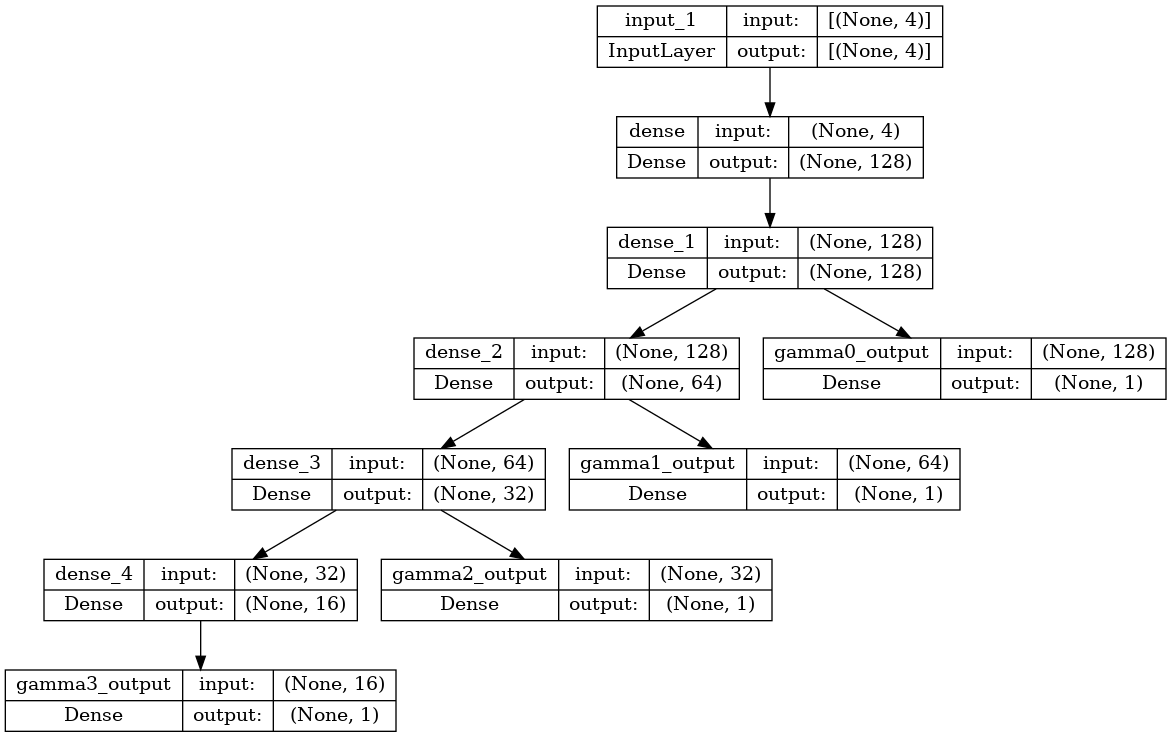

In [10]:
plot_model(model, to_file='original_combinedmll.png', show_shapes=True, show_layer_names=True)

In [11]:
#specify the optimizer as stochastic gradient descent and will mention the learning rate as 0.001
#compile the model with loss functions for both outputs
from keras import metrics

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss={'gamma0_output': 'mse', 'gamma1_output': 'mse', 'gamma2_output': 'mse', 'gamma3_output': 'mse'},
              metrics={
                       'gamma0_output': tf.keras.metrics.MeanSquaredError() ,
                       'gamma1_output': tf.keras.metrics.MeanSquaredError(),
                       'gamma2_output': tf.keras.metrics.MeanSquaredError() ,
                       'gamma3_output': tf.keras.metrics.MeanSquaredError()
                      })


endmetric = "mean_squared_error"


In [12]:
#train the model for a number of epochs

numepochs = 100
    
history = model.fit(norm_train_X.to_numpy(), train_Y,
                    epochs=numepochs, batch_size=10, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001,patience=100,mode='auto')])

Epoch 1/100
23/23 [==============================] - 2s 20ms/step - loss: 0.6260 - gamma0_output_loss: 0.3758 - gamma1_output_loss: 0.0865 - gamma2_output_loss: 0.0439 - gamma3_output_loss: 0.1198 - gamma0_output_mean_squared_error: 0.3758 - gamma1_output_mean_squared_error: 0.0865 - gamma2_output_mean_squared_error: 0.0439 - gamma3_output_mean_squared_error: 0.1198 - val_loss: 0.2672 - val_gamma0_output_loss: 0.1499 - val_gamma1_output_loss: 0.0674 - val_gamma2_output_loss: 0.0260 - val_gamma3_output_loss: 0.0239 - val_gamma0_output_mean_squared_error: 0.1499 - val_gamma1_output_mean_squared_error: 0.0674 - val_gamma2_output_mean_squared_error: 0.0260 - val_gamma3_output_mean_squared_error: 0.0239
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 0.2426 - gamma0_output_loss: 0.1331 - gamma1_output_loss: 0.0759 - gamma2_output_loss: 0.0232 - gamma3_output_loss: 0.0104 - gamma0_output_mean_squared_error: 0.1331 - gamma1_output_mean_squared_error: 0.0759 - gamma2_o

Epoch 13/100
23/23 [==============================] - 0s 8ms/step - loss: 0.1709 - gamma0_output_loss: 0.1098 - gamma1_output_loss: 0.0568 - gamma2_output_loss: 0.0036 - gamma3_output_loss: 5.7401e-04 - gamma0_output_mean_squared_error: 0.1098 - gamma1_output_mean_squared_error: 0.0568 - gamma2_output_mean_squared_error: 0.0036 - gamma3_output_mean_squared_error: 5.7401e-04 - val_loss: 0.2015 - val_gamma0_output_loss: 0.1298 - val_gamma1_output_loss: 0.0666 - val_gamma2_output_loss: 0.0042 - val_gamma3_output_loss: 8.9585e-04 - val_gamma0_output_mean_squared_error: 0.1298 - val_gamma1_output_mean_squared_error: 0.0666 - val_gamma2_output_mean_squared_error: 0.0042 - val_gamma3_output_mean_squared_error: 8.9585e-04
Epoch 14/100
23/23 [==============================] - 0s 9ms/step - loss: 0.1748 - gamma0_output_loss: 0.1135 - gamma1_output_loss: 0.0573 - gamma2_output_loss: 0.0034 - gamma3_output_loss: 5.3115e-04 - gamma0_output_mean_squared_error: 0.1135 - gamma1_output_mean_squared_err

23/23 [==============================] - 0s 5ms/step - loss: 0.1723 - gamma0_output_loss: 0.1113 - gamma1_output_loss: 0.0574 - gamma2_output_loss: 0.0033 - gamma3_output_loss: 2.4525e-04 - gamma0_output_mean_squared_error: 0.1113 - gamma1_output_mean_squared_error: 0.0574 - gamma2_output_mean_squared_error: 0.0033 - gamma3_output_mean_squared_error: 2.4525e-04 - val_loss: 0.3013 - val_gamma0_output_loss: 0.1931 - val_gamma1_output_loss: 0.1015 - val_gamma2_output_loss: 0.0064 - val_gamma3_output_loss: 2.9588e-04 - val_gamma0_output_mean_squared_error: 0.1931 - val_gamma1_output_mean_squared_error: 0.1015 - val_gamma2_output_mean_squared_error: 0.0064 - val_gamma3_output_mean_squared_error: 2.9588e-04
Epoch 36/100
23/23 [==============================] - 0s 5ms/step - loss: 0.1735 - gamma0_output_loss: 0.1124 - gamma1_output_loss: 0.0577 - gamma2_output_loss: 0.0032 - gamma3_output_loss: 2.5015e-04 - gamma0_output_mean_squared_error: 0.1124 - gamma1_output_mean_squared_error: 0.0577 - 

23/23 [==============================] - 0s 9ms/step - loss: 0.1716 - gamma0_output_loss: 0.1129 - gamma1_output_loss: 0.0556 - gamma2_output_loss: 0.0031 - gamma3_output_loss: 1.3378e-04 - gamma0_output_mean_squared_error: 0.1129 - gamma1_output_mean_squared_error: 0.0556 - gamma2_output_mean_squared_error: 0.0031 - gamma3_output_mean_squared_error: 1.3378e-04 - val_loss: 0.2049 - val_gamma0_output_loss: 0.1259 - val_gamma1_output_loss: 0.0725 - val_gamma2_output_loss: 0.0063 - val_gamma3_output_loss: 2.4274e-04 - val_gamma0_output_mean_squared_error: 0.1259 - val_gamma1_output_mean_squared_error: 0.0725 - val_gamma2_output_mean_squared_error: 0.0063 - val_gamma3_output_mean_squared_error: 2.4274e-04
Epoch 58/100
23/23 [==============================] - 0s 6ms/step - loss: 0.1585 - gamma0_output_loss: 0.1039 - gamma1_output_loss: 0.0518 - gamma2_output_loss: 0.0027 - gamma3_output_loss: 1.5270e-04 - gamma0_output_mean_squared_error: 0.1039 - gamma1_output_mean_squared_error: 0.0518 - 

23/23 [==============================] - 0s 6ms/step - loss: 0.1689 - gamma0_output_loss: 0.1103 - gamma1_output_loss: 0.0557 - gamma2_output_loss: 0.0027 - gamma3_output_loss: 1.0803e-04 - gamma0_output_mean_squared_error: 0.1103 - gamma1_output_mean_squared_error: 0.0557 - gamma2_output_mean_squared_error: 0.0027 - gamma3_output_mean_squared_error: 1.0803e-04 - val_loss: 0.2047 - val_gamma0_output_loss: 0.1310 - val_gamma1_output_loss: 0.0700 - val_gamma2_output_loss: 0.0036 - val_gamma3_output_loss: 1.4074e-04 - val_gamma0_output_mean_squared_error: 0.1310 - val_gamma1_output_mean_squared_error: 0.0700 - val_gamma2_output_mean_squared_error: 0.0036 - val_gamma3_output_mean_squared_error: 1.4074e-04
Epoch 80/100
23/23 [==============================] - 0s 5ms/step - loss: 0.1622 - gamma0_output_loss: 0.1049 - gamma1_output_loss: 0.0545 - gamma2_output_loss: 0.0027 - gamma3_output_loss: 1.0388e-04 - gamma0_output_mean_squared_error: 0.1049 - gamma1_output_mean_squared_error: 0.0545 - 

In [13]:
loss, gamma0_loss, gamma0_accuracy, gamma1_loss, gamma1_accuracy, gamma2_loss, gamma2_accuracy, gamma3_loss, gamma3_accuracy = model.evaluate(x=norm_test_X.to_numpy(), y=test_Y)

3/3 [==============================] - 0s 16ms/step - loss: 0.2466 - gamma0_output_loss: 0.1585 - gamma1_output_loss: 0.0832 - gamma2_output_loss: 0.0048 - gamma3_output_loss: 7.3174e-05 - gamma0_output_mean_squared_error: 0.1585 - gamma1_output_mean_squared_error: 0.0832 - gamma2_output_mean_squared_error: 0.0048 - gamma3_output_mean_squared_error: 7.3174e-05


In [14]:
#predictions = model.predict(norm_test_X.to_numpy())

predictions = model.predict(norm_train_X.to_numpy())
#predictions = unnorm(new_predictions)


9/9 [==============================] - 0s 8ms/step


In [ ]:
count = 0
numbad = 0

for i in range(60):  #for i in range(len(sd_gamma0))
    
    count +=1 
    
    try: 
        gam0 = float(predictions[0][i])
        gam1 = float(predictions[1][i])
        gam2 = float(predictions[2][i])
        gam3 = float(predictions[3][i])
    
        ipred_EOS = lal.SimNeutronStarEOS4ParameterSpectralDecomposition(gam0,gam1,gam2,gam3)
    
        ipred_h = np.linspace(0.0001,lal.SimNeutronStarEOSMaxPseudoEnthalpy(ipred_EOS),1000)

        ipred_hmin = 0.0001
        ipred_hmax = lal.SimNeutronStarEOSMaxPseudoEnthalpy(ipred_EOS)
    
        ipred_loghmin = np.log10(ipred_hmin)
        ipred_loghmax = np.log10(ipred_hmax)

        ipred_rho = []
        ipred_p = []

        for k in range(len(ipred_h)):
            ipred_rho.append(lal.SimNeutronStarEOSRestMassDensityOfPseudoEnthalpy(ipred_h[k],ipred_EOS)*.001)
            ipred_p.append(lal.SimNeutronStarEOSPressureOfPseudoEnthalpy(ipred_h[k],ipred_EOS)*10)
            
        ipred_rho = np.array(ipred_rho)
        ipred_p = np.array(ipred_p)

        plt.plot(np.log10(ipred_rho),np.log10(ipred_p),alpha=0.25,color='orange')
        
        plt.xlabel("mass density")
        plt.ylabel("pressure")
        
        print(count)
        
    except:
        print(count, " no good")
        numbad += 1
    
plt.xlim([14,15.4])
plt.ylim([32,37])
plt.xlabel("mass density")
plt.ylabel("pressure")
plt.show() 

print("There were", numbad, "bad samples.")

# Loss

In [63]:
history.history.keys() 

dict_keys(['loss', 'gamma0_output_loss', 'gamma1_output_loss', 'gamma2_output_loss', 'gamma3_output_loss', 'gamma0_output_mean_squared_error', 'gamma1_output_mean_squared_error', 'gamma2_output_mean_squared_error', 'gamma3_output_mean_squared_error', 'val_loss', 'val_gamma0_output_loss', 'val_gamma1_output_loss', 'val_gamma2_output_loss', 'val_gamma3_output_loss', 'val_gamma0_output_mean_squared_error', 'val_gamma1_output_mean_squared_error', 'val_gamma2_output_mean_squared_error', 'val_gamma3_output_mean_squared_error'])

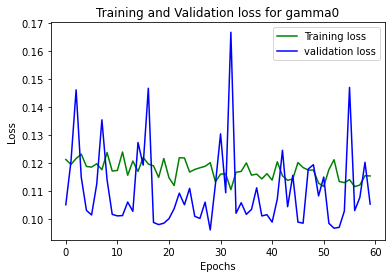

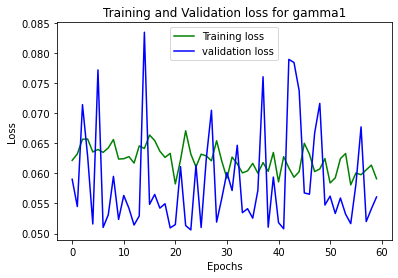

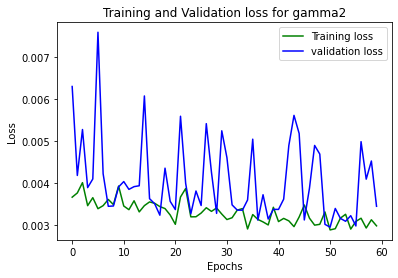

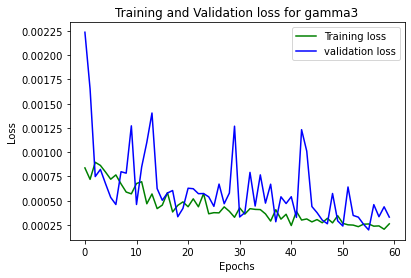

In [64]:
#loss for gamma0 values
loss_train = history.history['gamma0_output_loss']
loss_val = history.history['val_gamma0_output_loss']
epochs = range(0,numepochs)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss for gamma0')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#loss for gamma1 values
loss_train = history.history['gamma1_output_loss']
loss_val = history.history['val_gamma1_output_loss']
epochs = range(0,numepochs)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss for gamma1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#loss for gamma2 values
loss_train = history.history['gamma2_output_loss']
loss_val = history.history['val_gamma2_output_loss']
epochs = range(0,numepochs)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss for gamma2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#loss for gamma3 values
loss_train = history.history['gamma3_output_loss']
loss_val = history.history['val_gamma3_output_loss']
epochs = range(0,numepochs)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss for gamma3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Metric

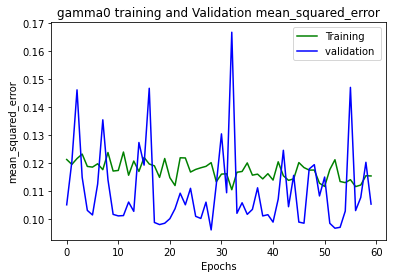

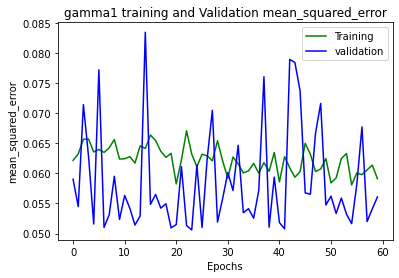

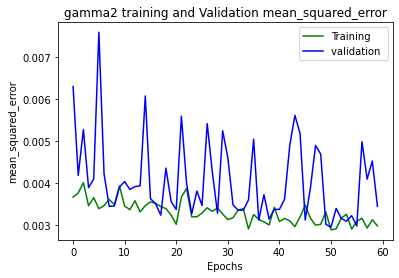

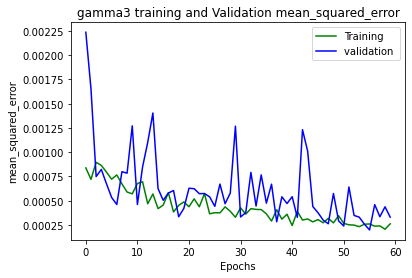

In [70]:
val = 'val_'
gam0out = 'gamma0_output_'
gam1out = 'gamma1_output_'
gam2out = 'gamma2_output_'
gam3out = 'gamma3_output_'

ac_train = history.history[gam0out + endmetric]
ac_val = history.history[val + gam0out + endmetric]
plt.plot(ac_train, 'g', label='Training')
plt.plot(ac_val, 'b', label='validation ')
plt.title('gamma0 training and Validation ' + endmetric)
plt.xlabel('Epochs')
plt.ylabel(endmetric)
plt.legend()
plt.show()



ac_train = history.history[gam1out + endmetric]
ac_val = history.history[val + gam1out + endmetric]
plt.plot(ac_train, 'g', label='Training')
plt.plot(ac_val, 'b', label='validation')
plt.title('gamma1 training and Validation ' + endmetric)
plt.xlabel('Epochs')
plt.ylabel(endmetric)
plt.legend()
plt.show()

ac_train = history.history[gam2out + endmetric]
ac_val = history.history[val + gam2out + endmetric]
plt.plot(ac_train, 'g', label='Training ',)
plt.plot(ac_val, 'b', label='validation ')
plt.title('gamma2 training and Validation ' + endmetric)
plt.xlabel('Epochs')
plt.ylabel(endmetric)
plt.legend()
plt.show()

ac_train = history.history[gam3out + endmetric]
ac_val = history.history[val + gam3out + endmetric]
plt.plot(ac_train, 'g', label='Training ')
plt.plot(ac_val, 'b', label='validation ')
plt.title('gamma3 training and Validation ' + endmetric)
plt.xlabel('Epochs')
plt.ylabel(endmetric)
plt.legend()
plt.show()